## Structured Framework for Selecting Indian Equity Mutual Funds

In [1]:
import numpy as np
import pandas as pd

C:\Users\mahmu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_nav_history = pd.read_parquet('mutual_fund_nav_history.parquet').reset_index() # historical dataset for all funds
df_schemes = pd.read_csv('mutual_fund_data.csv') # additional information about each fund
merged_database = pd.merge(df_schemes, df_nav_history, on="Scheme_Code", how='inner')
merged_database = merged_database.sort_values(by="Date")

In [3]:
# historical dataset with necessary columns

In [5]:
new_database = merged_database[['Scheme_Code','AMC','Scheme_Type','Scheme_Category', 'Scheme_NAV_Name',
                                'Launch_Date','Closure_Date','Date','NAV_y']]

### Flexi-Cap Universe

In [7]:
flexi_cap_universe = new_database[new_database['Scheme_Category'].str.contains('Equity Scheme - Flexi Cap Fund')]
flexi_cap_regular_growth = flexi_cap_universe[~flexi_cap_universe['Scheme_NAV_Name'].str.contains('IDCW|Direct|Income Distribution|Dividend', case=False)]

In [8]:
print(f"The number of Regular Growth Flexi Caps is {flexi_cap_regular_growth['Scheme_NAV_Name'].nunique()}. These are:")

unique = flexi_cap_regular_growth.loc[
    ~flexi_cap_regular_growth.loc[:, ['Scheme_NAV_Name', 'Launch_Date']].duplicated(),
    ['Scheme_NAV_Name', 'Launch_Date']
]
unique

The number of Regular Growth Flexi Caps is 42. These are:


,Scheme_NAV_Name,Launch_Date
3137880,Aditya Birla Sun Life Flexi Cap Fund - Growth ...,1998-08-17
543374,Taurus Flexi Cap Fund - Regular Plan - Growth,1994-01-29
2115328,CANARA ROBECO FLEXICAP FUND - REGULAR PLAN - G...,2003-08-29
294753,LIC MF Flexi Cap Fund-Regular Plan-Growth,1998-04-16
600464,Franklin India Flexi Cap Fund - Growth,1994-09-29
839768,UTI - Flexi Cap Fund-Growth Option,1992-04-20
2462726,HSBC Flexi Cap Fund - Regular Growth,2004-01-22
1878060,HDFC Flexi Cap Fund - Growth Plan,1994-12-08
3208358,SBI Flexicap Fund - REGULAR PLAN -Growth Option,2005-08-22
4041935,DSP Flexi Cap Fund - Regular Plan - Growth,1997-04-04


In [9]:
flexi_cap_regular_growth_prices = flexi_cap_regular_growth.pivot_table(index='Date',columns='Scheme_NAV_Name',values='NAV_y')
returns = flexi_cap_regular_growth_prices.pct_change() # returns
returns

Scheme_NAV_Name,360 ONE FLEXICAP FUND-REGULAR PLAN- GROWTH,Aditya Birla Sun Life Flexi Cap Fund - Growth - Regular Plan,Axis Flexi Cap Fund - Regular Plan - Growth,BANDHAN Flexi Cap Fund - Regular Plan - Growth,BANK OF INDIA Flexi Cap Fund Regular Plan -Growth,Bajaj Finserv Flexi Cap Fund -Regular Plan-Growth,Baroda BNP Paribas Flexi Cap Fund - Regular Plan - Growth Option,CANARA ROBECO FLEXICAP FUND - REGULAR PLAN - GROWTH OPTION,CAPITALMIND FLEXI CAP FUND REGULAR GROWTH,DSP Flexi Cap Fund - Regular Plan - Growth,...,Sundaram Flexicap Fund Regular Growth,THE WEALTH COMPANY FLEXI CAP FUND - REGULAR GROWTH,TRUSTMF Flexi Cap Fund-Regular Plan- Growth,Tata Flexi Cap Fund -Regular Plan-Growth,Taurus Flexi Cap Fund - Regular Plan - Growth,UTI - Flexi Cap Fund-Growth Option,Unifi Flexi Cap Fund - Regular Growth,Union Flexi Cap Fund - Growth Option,WhiteOak Capital Flexi Cap Fund Regular Plan-Growth,quant Flexi Cap Fund - Growth Option - Regular Plan
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-04,NaN,0.003424,NaN,NaN,NaN,NaN,NaN,0.013608,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.002840,0.007297,NaN,NaN,NaN,NaN
2006-04-05,NaN,0.008437,NaN,NaN,NaN,NaN,NaN,0.012770,NaN,NaN,...,NaN,NaN,NaN,NaN,0.042153,0.010263,NaN,NaN,NaN,NaN
2006-04-07,NaN,-0.012673,NaN,NaN,NaN,NaN,NaN,-0.007759,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002460,-0.014042,NaN,NaN,NaN,NaN
2006-04-10,NaN,0.004175,NaN,NaN,NaN,NaN,NaN,0.004888,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000273,0.010303,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-14,-0.005056,-0.002569,-0.004064,-0.005410,-0.008236,-0.001887,-0.004344,-0.003354,-0.006282,-0.007888,...,-0.003682,NaN,-0.007785,-0.004206,-0.007225,-0.006423,-0.003871,-0.007144,-0.004462,-0.002680
2025-10-15,0.011814,0.009072,0.011128,0.007528,0.009737,0.008442,0.008817,0.007281,0.007897,0.011775,...,0.005159,NaN,0.010462,0.005036,0.006876,0.012178,0.008059,0.009335,0.011206,0.005854
2025-10-16,0.005205,0.011307,0.006236,0.007538,0.001985,0.005692,0.005855,0.006912,0.004779,0.000000,...,0.008112,NaN,0.003451,0.009169,0.005942,0.008718,0.007680,0.006166,0.007331,0.007322


### Rolling Moments

In [11]:
end = returns.index.max() #index being date time
start = end - pd.DateOffset(years=7)
old_returns = returns.loc[start:end] # old_returns = returns of funds that have existed since before covid

In [12]:
young_funds = ["BANK OF INDIA","ICICI Prudential","Nippon India","Mahindra Manulife","Samco","WhiteOak Capital",
                    "Baroda BNP Paribas","Sundaram","ITI Flexi","Mirae Asset","360 ONE","THE WEALTH COMPANY","CAPITALMIND",
                    "Unifi","TRUSTMF","Helios","NJ","Bajaj Finserv","Invesco"] #young funds defined as funds released after 2020
pattern = "|".join(young_funds)

old_returns = old_returns.loc[:, ~old_returns.columns.str.contains(pattern)]

#### Rolling Mean

In [14]:
rolling_mean = old_returns.rolling(window=252).mean() #window = 252 from 252 trading days in year

In [24]:
ann_mean = rolling_mean.mean()*252 # mean of each column, annualised

#### Rolling Standard Deviation

In [19]:
rolling_std = old_returns.rolling(window=252).std(ddof=1)

In [20]:
ann_std = rolling_std.mean()*(252**0.5) # mean of each column, annualised

### Final Metrics

#### Risk-free Rate

In [21]:
rf = 0.067 

    # the "annual" risk-free rate for the indian market is taken as the 10-year government bond yield 
    # (Source: Unverified perplexity)

#### Consolidated Table

In [26]:
df = pd.DataFrame({"Mean": ann_mean, "SD": ann_std,}) # creating a DataFrame from two series
df["Sharpe"] = (df["Mean"] - rf)/df["SD"]
df

,Mean,SD,Sharpe
Scheme_NAV_Name,,,
Aditya Birla Sun Life Flexi Cap Fund - Growth - Regular Plan,0.169865,0.168704,0.609738
Axis Flexi Cap Fund - Regular Plan - Growth,0.155144,0.158205,0.557153
BANDHAN Flexi Cap Fund - Regular Plan - Growth,0.151287,0.157578,0.534892
CANARA ROBECO FLEXICAP FUND - REGULAR PLAN - GROWTH OPTION,0.172310,0.157837,0.667210
DSP Flexi Cap Fund - Regular Plan - Growth,0.181698,0.165947,0.691173
Edelweiss Flexi Cap Fund - Regular Plan - Growth Option,0.180283,0.167810,0.675067
Franklin India Flexi Cap Fund - Growth,0.191460,0.167517,0.742970
HDFC Flexi Cap Fund - Growth Plan,0.202544,0.168956,0.802245
HSBC Flexi Cap Fund - Regular Growth,0.179021,0.178406,0.627900


#### Graph

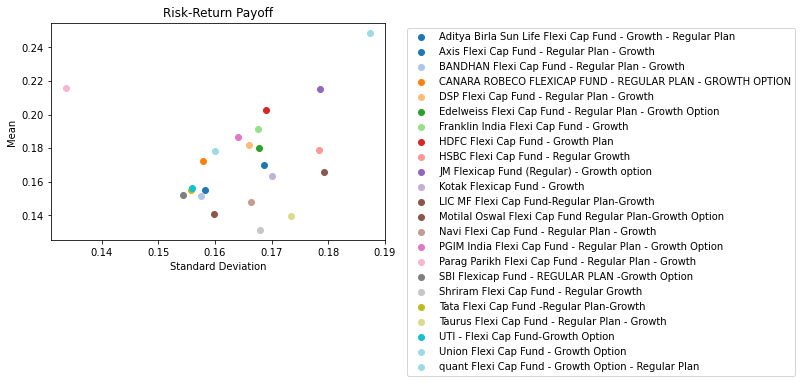

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

cmap = cm.get_cmap("tab20", len(df["SD"]))

for i, fund in enumerate(df.index):
    x = df.loc[fund, "SD"]
    y = df.loc[fund, "Mean"]
    plt.scatter(x, y, color=cmap(i), label=fund)

plt.xlabel("Standard Deviation")
plt.ylabel("Mean")
plt.title("Risk-Return Payoff")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()